In [1]:
H0km = 67.4
ΩΛ = 0.685
Ωm = 0.315


In [2]:
import cosmolopy.magnitudes as cm
import cosmolopy.distance as cd

cosmo = {'omega_M_0' : Ωm, 'omega_lambda_0' : ΩΛ, 
         'h' : H0km/100, 'omega_k_0': 0}

data2 = []

z = 0.1
pc2ly = 3.261564
while z < 15:
    dL = cd.luminosity_distance(z, **cosmo)  # * pc2ly
    dm = cm.distance_modulus(z, **cosmo)
    
    data2.append([z, dL, dm])
    
    z += 0.1

In [3]:
import cosmolopy.magnitudes as cm
import cosmolopy.distance as cd

cosmo = {'omega_M_0' : Ωm, 'omega_lambda_0' : ΩΛ, 
         'h' : 73/100, 'omega_k_0': 0}

data3 = []

z = 0.1
pc2ly = 3.261564
while z < 15:
    dL = cd.luminosity_distance(z, **cosmo)  # * pc2ly
    dm = cm.distance_modulus(z, **cosmo)
    
    data3.append([z, dL, dm])
    
    z += 0.1

In [4]:
import math
data = []

z = 0.1
pc2ly = 3.261564
while z < 15:
    dL = 299792/70 * (1+z) * math.log(1+z) #  * pc2ly
    dm = 5 * math.log10(dL) + 25
    
    data.append([z, dL, dm])
    
    z += 0.1

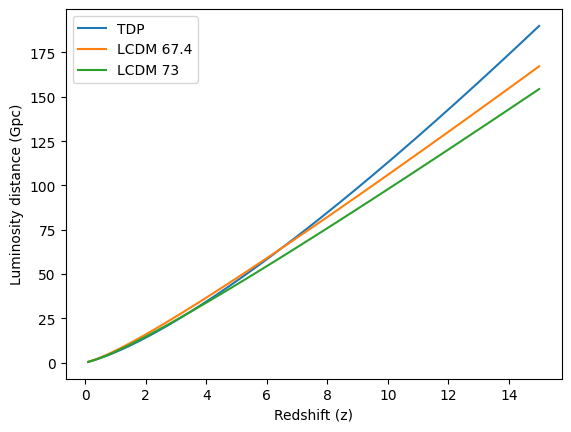

In [25]:
import matplotlib.pyplot as plt

dataz = [row[0] for row in data] 
datad1 = [row[1]/1000 for row in data] 
datad2 = [row[1]/1000 for row in data2] 
datad3 = [row[1]/1000 for row in data3] 
    
plt.plot(dataz, datad1, label = "TDP")
plt.plot(dataz, datad2, label = f"LCDM {H0km}")
plt.plot(dataz, datad3, label = f"LCDM 73")

plt.xlabel("Redshift (z)")
plt.ylabel("Luminosity distance (Gpc)")
plt.legend()

#plt.savefig('lcdm676tdpr.png',  bbox_inches='tight')
plt.show()

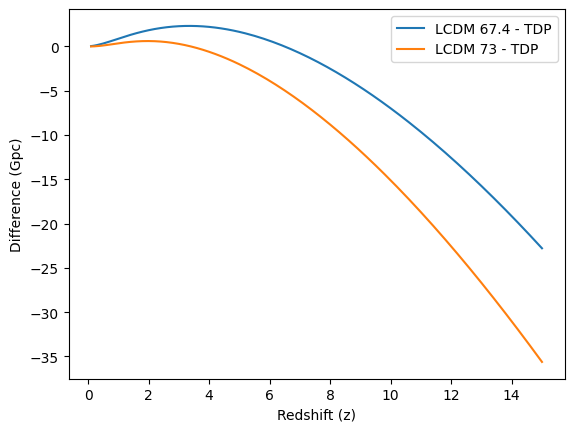

In [27]:
import matplotlib.pyplot as plt

dataz = [row[0] for row in data] 
datad = []
datad2 = []

for i in range(len(data)):
    datad.append((data2[i][1] - data[i][1])/1000)
    datad2.append((data3[i][1] - data[i][1])/1000)
        
plt.plot(dataz, datad, label = f"LCDM {H0km} - TDP")
plt.plot(dataz, datad2, label = f"LCDM 73 - TDP")

plt.xlabel("Redshift (z)")
plt.ylabel("Difference (Gpc)")
#plt.ylabel("Luminosity distance (Mpc)")
plt.legend()

#plt.savefig('lcdm676tdpr.png',  bbox_inches='tight')
plt.show()

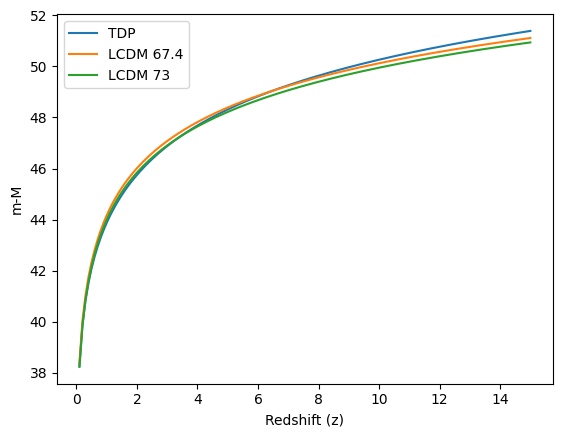

In [7]:
import matplotlib.pyplot as plt

dataz = [row[0] for row in data] 
datad1 = [row[2] for row in data] 
datad2 = [row[2] for row in data2] 
datad3 = [row[2] for row in data3] 
    
plt.plot(dataz, datad1, label = "TDP")
plt.plot(dataz, datad2, label = f"LCDM {H0km}")
plt.plot(dataz, datad3, label = f"LCDM 73")

plt.xlabel("Redshift (z)")
plt.ylabel("m-M")
plt.legend()

#plt.savefig('lcdm676tdpr.png',  bbox_inches='tight')
plt.show()

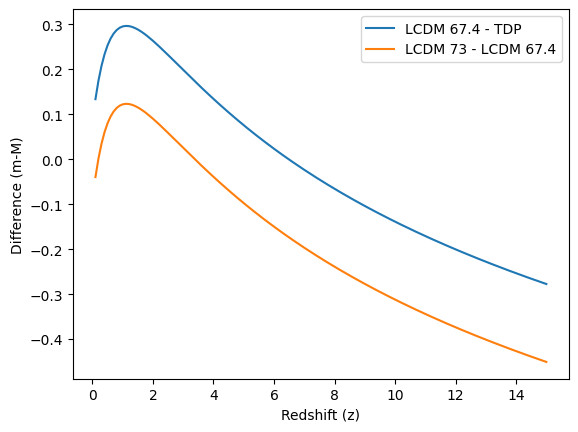

In [28]:
import matplotlib.pyplot as plt

dataz = [row[0] for row in data] 
datad = []
datad2 = []
for i in range(len(data)):
    datad.append(data2[i][2] - data[i][2])
    datad2.append(data3[i][2] - data[i][2])
        
plt.plot(dataz, datad, label = f"LCDM {H0km} - TDP")
plt.plot(dataz, datad2, label = f"LCDM 73 - LCDM {H0km}")

plt.xlabel("Redshift (z)")
plt.ylabel("Difference (m-M)")
#plt.ylabel("Luminosity distance (Mpc)")
plt.legend()

#plt.savefig('lcdm676tdpr.png',  bbox_inches='tight')
plt.show()

In [23]:
i = 124
print(data2[i][2])
print(data3[i][2])
print(data3[i][2] - data2[i][2])

50.672972004947184
50.499657187021505
-0.1733148179256787


In [9]:
print((data[124][1] ) *pc2ly)
print((data2[124][1] ) *pc2ly)

490799.4459152626
444652.05713155423


In [10]:
data2[124][0]

12.499999999999972

In [11]:
z = 12.5

dL_lcdm = cd.luminosity_distance(z, **cosmo)  # * pc2ly
dm_lcdm = cm.distance_modulus(z, **cosmo)
print(dL_lcdm)
print(dm_lcdm)
    
dL = 299792/70 * (1+z) * math.log(1+z) #  * pc2ly
dm = 5 * math.log10(dL) + 25
print(dL)
print(dm)

125872.66794025867
50.49965718702151
150479.78390590037
50.88739079440544


In [12]:
#GS-z12  m - M 
m = 28.99 
M = -18.8

print(m - dm_lcdm)
print(m - dm)



-21.509657187021514
-21.897390794405442


In [13]:
print(cm.L_nu_from_magAB(m - dm_lcdm))
print(cm.L_nu_from_magAB(m - dm))

1.7450216895678776e+29
2.4939874991982768e+29
